In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

C:\Users\86131\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\86131\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\86131\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data=pd.read_csv('train_smote.csv')

In [3]:
data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,label
0,0,0.177807,-0.435464,0.173244,-0.339036,-0.036491,1.074802,0.181631,1.069594,0.34859,0.698654,-0.144749,-0.21852,0.851632,0.130109,0
1,1,-0.993245,0.721903,0.018238,1.084470,1.130745,-1.020020,-0.072637,-1.178617,0.34859,0.698654,-0.144749,-0.21852,-1.254868,0.130109,0
2,2,-0.993245,-0.435464,-0.092370,-0.515375,-0.425570,-1.020020,-0.815525,-0.918867,-2.73900,-1.431324,-0.144749,-0.21852,-0.039580,0.130109,0
3,3,1.056095,-0.435464,-0.631948,-0.515375,-0.425570,-0.857808,-0.881218,-0.710149,0.34859,-1.431324,-0.144749,-0.21852,-0.039580,0.130109,0
4,4,-1.066435,-0.435464,-0.639694,1.084470,1.130745,-1.020020,-0.926234,-1.178617,0.34859,-1.431324,-0.144749,-0.21852,-0.039580,0.130109,0


In [5]:
df=data.drop(columns=['Unnamed: 0','education','fnlwgt','capital.gain','capital.loss'])

In [6]:
df=df[['age','education.num','occupation','relationship','hours.per.week','label']]

In [7]:
df.shape

(39508, 6)

In [8]:
X=df.drop(['label'],axis=1)
y=df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 1. LR

In [10]:
# 逻辑回归模型
lr = LogisticRegression()
# 设置需要网格搜索的参数
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0],
    'max_iter': [30, 50, 70, 100],
    'solver': ['lfgbs', 'sag', 'liblinear', 'newton-cg', 'saga']
}

# 创建网格搜索对象
gscv = GridSearchCV(lr, params)

# 训练
gscv.fit(X_train, y_train)

# 查看最优参数
gscv.best_params_ 


{'C': 0.1, 'max_iter': 30, 'penalty': 'l2', 'solver': 'liblinear'}

label     0     1
row_0            
0      3096   671
1       864  3271
模型在训练集上的准确率为0.802411
模型在测试集上的准确率为0.805745


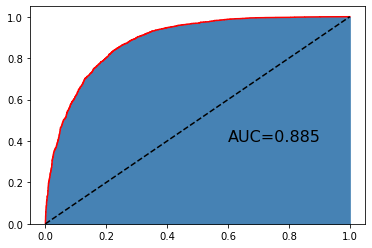

In [11]:
# 使用最佳参数重新创建实例化对象
lr = LogisticRegression(C=0.1, max_iter=30, penalty='l2', solver='liblinear')

# 训练
lr.fit(X_train, y_train)

# 打分
lr.score(X_test, y_test)
lr_pred = lr.predict(X_test)
print(pd.crosstab(lr_pred, y_test))

# 模型得分
print("模型在训练集上的准确率为%f" % lr.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % lr.score(X_test, y_test))



# 计算ROC曲线的x轴 和 y轴数据
fpr, tpr, _ = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1])
# 绘制ROC曲线
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
# 添加阴影
plt.stackplot(fpr, tpr, color='steelblue')
# 绘制参考线
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
# 添加文本
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()


# 2. KNN

In [12]:
# 选择不同的参数
k_options = list(range(1,12))
parameters = {'n_neighbors':k_options}
# 搜索不同的K值
grid_kn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid=parameters, cv=10, scoring='accuracy')
grid_kn.fit(X_train, y_train)
# 结果输出
grid_kn.cv_results_, grid_kn.best_params_, grid_kn.best_score_


({'mean_fit_time': array([0.0280092 , 0.02705166, 0.0328846 , 0.02808352, 0.02759931,
         0.02649846, 0.02756345, 0.0275625 , 0.02804511, 0.02825646,
         0.02901568]),
  'std_fit_time': array([0.00227366, 0.00192504, 0.01327212, 0.00475114, 0.0027358 ,
         0.00256604, 0.00235452, 0.00337216, 0.00221614, 0.00209393,
         0.00217665]),
  'mean_score_time': array([0.09243515, 0.0984416 , 0.12859652, 0.11286352, 0.10805931,
         0.11064637, 0.11393101, 0.11461701, 0.11746323, 0.12243621,
         0.12828562]),
  'std_score_time': array([0.0053766 , 0.00219062, 0.0411867 , 0.00595903, 0.0045182 ,
         0.00570411, 0.00406623, 0.00367252, 0.00323134, 0.00401336,
         0.00616027]),
  'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_neighbors': 1},
 

label     0     1
row_0            
0      3229   652
1       731  3290
模型在训练集上的准确率为0.874581
模型在测试集上的准确率为0.824981


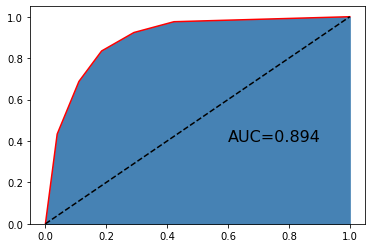

In [13]:
grid_kn_pred = grid_kn.predict(X_test)
print(pd.crosstab(grid_kn_pred, y_test))

# 模型得分
print("模型在训练集上的准确率为%f" % grid_kn.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % grid_kn.score(X_test, y_test))

fpr, tpr, _ = metrics.roc_curve(y_test, grid_kn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

# 3. 决策树

In [14]:
params = {'max_depth' : range(1, 20)}
best_clf = GridSearchCV(DecisionTreeClassifier(criterion = 'entropy', random_state = 20), param_grid = params)
best_clf = best_clf.fit(X_train, y_train)
print(best_clf.best_params_)


{'max_depth': 12}


In [15]:
# 决策树模型
model= DecisionTreeClassifier(criterion="entropy",max_depth=12,min_samples_split=5)#决策深度设为8，分裂节点所需样本数至少为5
clf_model=model.fit(X_train, y_train)
predict_train_clf = clf_model.predict(X_train)
predict_test_clf = clf_model.predict(X_test)
my_feature_name=['age','workclass','fnlwgt','education','education.num','martial.status','occupation','relationship','race','sex','captial.gain'
             ,'captial.loss','hours.per.week','native.country']
print('Training Accuracy:', metrics.accuracy_score(y_train, predict_train_clf))
print('Validation Accuracy:', metrics.accuracy_score(y_test, predict_test_clf))
print('参数权重：',[*zip(my_feature_name,clf_model.feature_importances_)])
cm_clf = confusion_matrix(y_test, predict_test_clf)
print("Confusion Matrix of Decision Tree:")
print(cm_clf)

Training Accuracy: 0.8684110611909132
Validation Accuracy: 0.8505441660339155
参数权重： [('age', 0.13259932767136226), ('workclass', 0.20893640422475035), ('fnlwgt', 0.12407753599222396), ('education', 0.39486873941389006), ('education.num', 0.13951799269777332)]
Confusion Matrix of Decision Tree:
[[3315  645]
 [ 536 3406]]


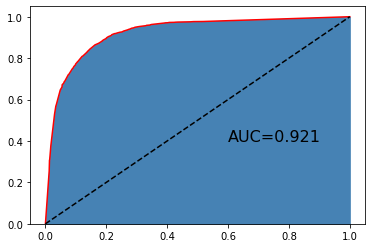

In [16]:
fpr, tpr, _ = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

# 4.SVM

In [20]:
svm= SVC(kernel = 'linear',probability=True)
svm = svm.fit(X_train, y_train)
# 模型得分
print("模型在训练集上的准确率为%f" % svm.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % svm.score(X_test, y_test))

模型在训练集上的准确率为0.790230
模型在测试集上的准确率为0.792584


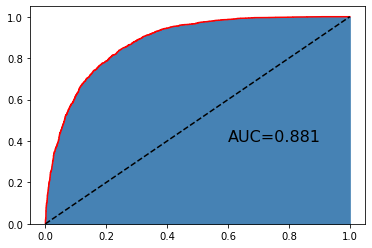

In [21]:
fpr, tpr, _ = metrics.roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

# 5.RandomForest

In [17]:
rfr_best = RandomForestClassifier()
params ={'n_estimators':range(50,200,5)}
gs = GridSearchCV(rfr_best, params, cv=5)
gs.fit(X_train,y_train)
 
#查验优化后的超参数配置
print(gs.best_score_)
print(gs.best_params_)


0.857875159510329
{'n_estimators': 185}


In [18]:
rf_best = RandomForestClassifier(n_estimators = 185,max_depth=10,min_samples_split=5,criterion='entropy')
rf_best = rf_best.fit(X_train, y_train)
score = rf_best.score(X_test, y_test)
# 模型得分
print("模型在训练集上的准确率为%f" % rf_best.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % rf_best.score(X_test, y_test))

模型在训练集上的准确率为0.865722
模型在测试集上的准确率为0.859909


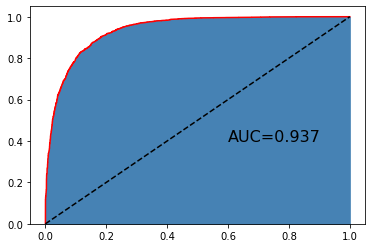

In [19]:
fpr, tpr, _ = metrics.roc_curve(y_test, rf_best.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

过拟合现象得到了很好地解决，比未加smote的数据好太多。AUC也提升了很多

# 6.Adaboost

In [20]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix of AdaBoost:")
print(cm_ada)
print("模型在训练集上的准确率为%f" % ada.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % ada.score(X_test, y_test))

Confusion Matrix of AdaBoost:
[[3212  748]
 [ 496 3446]]
模型在训练集上的准确率为0.841612
模型在测试集上的准确率为0.842572


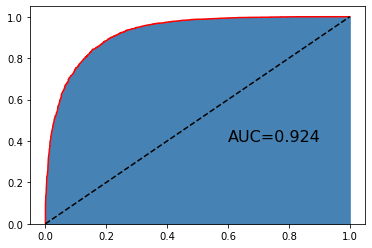

In [21]:
fpr, tpr, _ = metrics.roc_curve(y_test, ada.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

# 7. GBDT

label     0     1
row_0            
0      3298   436
1       662  3506
模型在训练集上的准确率为0.859742
模型在测试集上的准确率为0.861048


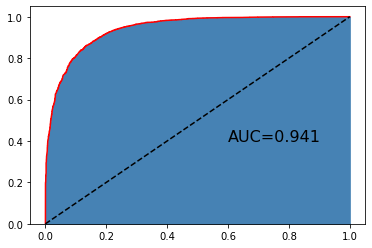

In [22]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train,y_train)
gbdt_pred = gbdt.predict(X_test)
print(pd.crosstab(gbdt_pred, y_test))

# 模型得分
print("模型在训练集上的准确率为%f" % gbdt.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % gbdt.score(X_test, y_test))

fpr, tpr, _ = metrics.roc_curve(y_test, gbdt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()


# 8. NB

label     0     1
row_0            
0      3137   689
1       823  3253
模型在训练集上的准确率为0.806651
模型在测试集上的准确率为0.808656


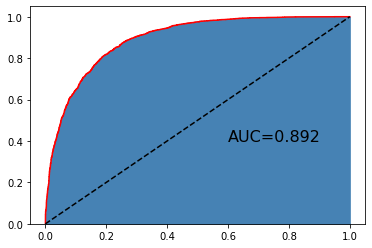

In [23]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
acc_nb = accuracy_score(y_test, nb_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
print(pd.crosstab(nb_pred, y_test))

# 模型得分
print("模型在训练集上的准确率为%f" % nb.score(X_train, y_train))
print("模型在测试集上的准确率为%f" % nb.score(X_test, y_test))

fpr, tpr, _ = metrics.roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, linestyle = 'solid', color ='red')
plt.stackplot(fpr, tpr, color='steelblue')
plt.plot([0,1],[0,1],linestyle='dashed', color='black')
plt.text(0.6, 0.4, 'AUC=%.3f' % metrics.auc(fpr,tpr), fontdict=dict(size =16))
plt.show()

# 总结

## 表一：原数据准确率比较

|模型|训练集准确率|测试集准确率|AUC|
|:---|:---|:---|:---|
|逻辑回归|82.9%|82.4%|0.877|
|KNN|85.1%|82.1%|0.858|
|决策树|84.2%|83.6%|0.873|
|SVM|82.9%|82.4%|0.876|
|随机森林|85.2%|83.8%|0.885|
|Adaboost|83.6%|83.3%|0.883|
|GBDT|84.4%|83.7%|0.886|
|朴素贝叶斯|82.9%|82.9%|0.880|

## 表二：使用smote后准确率比较

|模型|训练集准确率|测试集准确率|AUC|
|:---|:---|:---|:---|
|逻辑回归|80.2%|80.6%|0.885|
|KNN|87.5%|82.5%|0.894|
|决策树|86.8%|85.1%|0.921|
|SVM|79.0%|79.3%|0.881|
|随机森林|86.6%|86.0%|0.937|
|Adaboost|84.2%|84.3%|0.924|
|GBDT|86.0%|86.1%|0.941|
|朴素贝叶斯|80.7%|80.9%|0.892|

使用smote前后的数据建模选择的变量相同。可以看到，使用smote后AUC得到了明显提升，有部分算法准确率提升，部分算法准确率下降。